# **Caricamento e descrizione del dataset**

Importiamo librerie e tutto il dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainingData = pd.read_csv('./Data/trainingData.csv')
trainingData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [3]:
validationData = pd.read_csv('./Data/validationData.csv')
validationData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


Qui eseguiamo una rappresentazione dall'alto del dataset, dove sono presenti i 3 palazzi

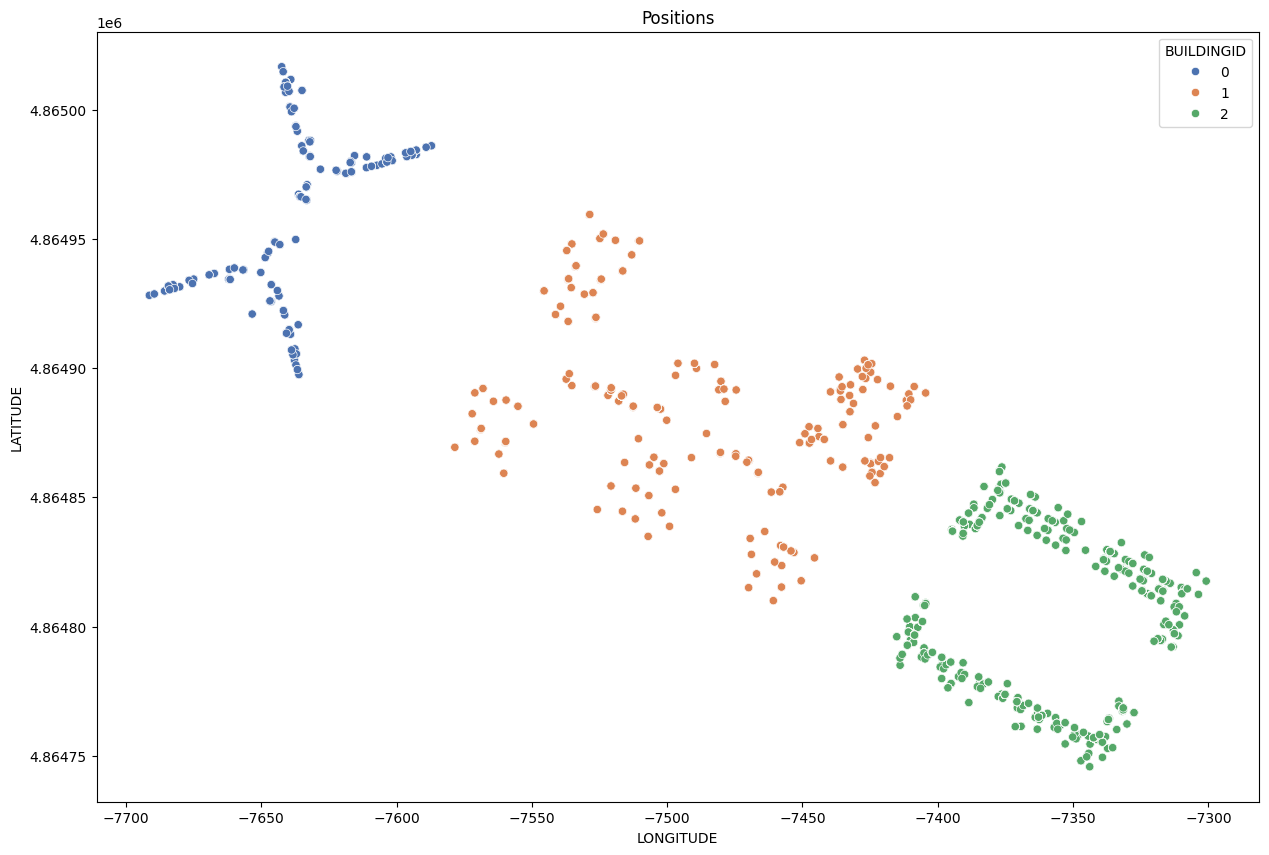

In [ ]:
data_pos = trainingData
plt.figure(figsize = (15,10))
plt.title("Positions")
plt.xlabel("LONGITUDE")
sns.scatterplot(data = data_pos, x = 'LONGITUDE', y = 'LATITUDE',hue='BUILDINGID',palette='deep')
plt.show()

Mentre qui abbiamo una rappresentazione 3D dei palazzi, dove è possibile vedere come i primi 2 posseggono 4 piani, mentre l'ultimo ne possiede 5

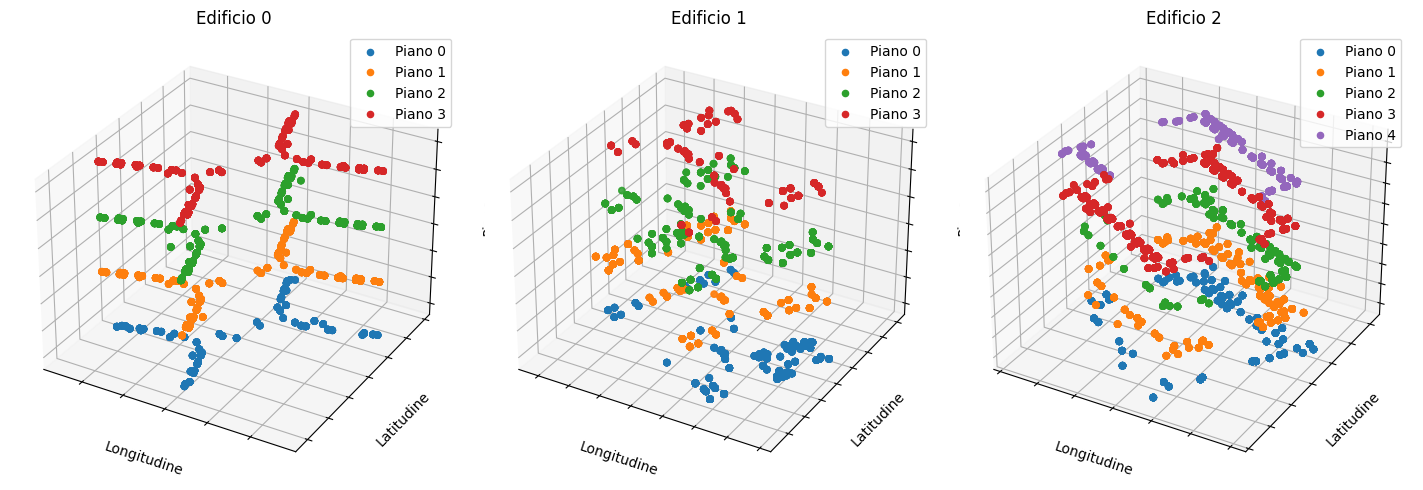

In [ ]:
unique_building_ids = np.unique(data_pos['BUILDINGID'])
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(1/3), subplot_kw={'projection': '3d'})

for i, building_id in enumerate(unique_building_ids):
    floor_data = data_pos.loc[data_pos['BUILDINGID'] == building_id]
    unique_floors = np.unique(floor_data['FLOOR'])

    for j, floor in enumerate(unique_floors):
        axes[i].scatter(
            floor_data['LONGITUDE'][floor_data['FLOOR'] == floor],
            floor_data['LATITUDE'][floor_data['FLOOR'] == floor],
            floor_data['FLOOR'][floor_data['FLOOR'] == floor],
            label=f"Piano {floor}"  # Aggiunta etichette piano per chiarezza
        )
    axes[i].set_title(f"Edificio {building_id}")
    axes[i].set_xlabel("Longitudine")
    axes[i].set_ylabel("Latitudine")
    axes[i].set_zlabel("Piano")

    axes[i].xaxis.set_major_formatter(lambda x, pos: '')
    axes[i].yaxis.set_major_formatter(lambda x, pos: '')
    axes[i].zaxis.set_major_formatter(lambda x, pos: '')

    axes[i].legend()
plt.tight_layout()
plt.show()

# **Pulizia e gestione dei dati**

## Drop degli attributi superflui

Rimuoviamo le colonne che non sono necessarie all'allenamento del modello, ossia:

**SPACEID, RELATIVEPOSITION, USERID, PHONEID e TIMESTAMP**

Sia sul training set che il test set

In [4]:
trainingData.drop(['SPACEID','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'], axis=1, inplace=True )
trainingData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7541.2643,4.864921e+06,2,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7536.6212,4.864934e+06,2,1
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,-7519.1524,4.864950e+06,2,1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7524.5704,4.864934e+06,2,1
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7632.1436,4.864982e+06,0,0


In [5]:
validationData.drop(['SPACEID','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'], axis=1, inplace=True )
validationData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7515.916799,4.864890e+06,1,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7383.867221,4.864840e+06,4,2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7374.302080,4.864847e+06,4,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7365.824883,4.864843e+06,4,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7641.499303,4.864922e+06,2,0


## Gestione missing values

Vediamo se sono presenti dati mancanti all'interno del dataset, sommando questi ultimi in un unico valore

In [ ]:
print('Numero di dati mancanti nel training set: ',trainingData.isnull().sum().sum())
print('Numero di dati mancanti nel test set: ',validationData.isnull().sum().sum())

Numero di dati mancanti nel training set:  0
Numero di dati mancanti nel test set:  0


Non manca alcun dato nel dataset, non è quindi necessario gestirli con strumenti come SimpleImputer

## Creazione attributo BUILDING_FLOOR

Per predire edificio e piano, anziché due modelli distinti, possiamo ridurre le due feature a una tramite la formula BUILDINGID*10 + FLOOR.

*Esempio:* BUILDINGID = 2, FLOOR = 3, allora BUILDING_FLOOR = 23.

In [6]:
trainingData['BUILDING_FLOOR'] = trainingData['BUILDINGID']*10 + trainingData['FLOOR']
validationData['BUILDING_FLOOR'] = validationData['BUILDINGID']*10 + validationData['FLOOR']

trainingData.drop(['FLOOR','BUILDINGID'], axis=1, inplace=True)
validationData.drop(['FLOOR','BUILDINGID'], axis=1, inplace=True)

trainingData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,BUILDING_FLOOR
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7541.2643,4.864921e+06,12
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7536.6212,4.864934e+06,12
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,-7519.1524,4.864950e+06,12
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7524.5704,4.864934e+06,12
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7632.1436,4.864982e+06,0


## Divisione del dataset in features e targets

Dividiamo adesso il dataset, dividendo in X_train le colonne del dataset che contengono WAP nel nome, in y_train il restante, facciamo questa procedura sia per training set che per il test set, così da suddividere features con targets.
Avendo un unica sezione di targets, quando alleneremo il modello, ci basta specificare quale target di y_train vogliamo allenare per quel specifico modello.

In [7]:
X_train = trainingData[[i for i in trainingData.columns if 'WAP' in i]]
y_train = trainingData[[i for i in trainingData.columns if not 'WAP' in i]]
print(X_train.shape, y_train.shape)
print(y_train.columns)

(19937, 520) (19937, 3)
Index(['LONGITUDE', 'LATITUDE', 'BUILDING_FLOOR'], dtype='object')


In [8]:
X_test = validationData[[i for i in validationData.columns if 'WAP' in i]]
y_test = validationData[[i for i in validationData.columns if not 'WAP' in i]]
print(X_test.shape, y_test.shape)
print(y_test.columns)

(1111, 520) (1111, 3)
Index(['LONGITUDE', 'LATITUDE', 'BUILDING_FLOOR'], dtype='object')


## Miglioramento continuità dei dati

Vogliamo ottimizzare i nostri dati prima dell'allenamento. Notiamo, intanto, come nel dataset venga utilizzato il valore 100 per indicare che una WAP è fuori range rispetto la posizione, mentre il più piccolo valore di una WAP in range è di -104.

Per migliorare la continuità dei valori per le trasformazioni a seguire, sostituiamo il valore 100 con -111 per indicare una WAP fuori portata.

In [9]:
X_train = X_train.replace(to_replace=100,value=-111)
X_test = X_test.replace(to_replace=100,value=-111)

#Visualizziamo la modifica nel training set
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,-111,-111,-111,-111,-111,-111,-111,-111,-111,-111,...,-111,-111,-111,-111,-111,-111,-111,-111,-111,-111
1,-111,-111,-111,-111,-111,-111,-111,-111,-111,-111,...,-111,-111,-111,-111,-111,-111,-111,-111,-111,-111
2,-111,-111,-111,-111,-111,-111,-111,-97,-111,-111,...,-111,-111,-111,-111,-111,-111,-111,-111,-111,-111
3,-111,-111,-111,-111,-111,-111,-111,-111,-111,-111,...,-111,-111,-111,-111,-111,-111,-111,-111,-111,-111
4,-111,-111,-111,-111,-111,-111,-111,-111,-111,-111,...,-111,-111,-111,-111,-111,-111,-111,-111,-111,-111


## Trasformazioni dei dati

Implementeremo nel modello una pipeline allo scopo di trasformare i dati per rendere più efficente la fase di allenamento del modello.

Inseriremo:
- ***Normalizzazione***: Trasformeremo i valori in un range da (-111,0) di adesso a (0,1) per velocizzare l'allenamento. Utilizzeremo **MinMax** per questo scopo.
Il codice a seguire mostra la variazione dei dati su una variabile di prova.

In [13]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_train_prova = pd.DataFrame(minmax.fit_transform(X_train))
X_train_prova.head()

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.28,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- ***Rimozione features con bassa varianza***: dati con bassa varianza danno poca informazione al modello al fine di predirre classi o valori. Rimuovendoli evitiamo possibili rumori e riduciamo la complessità, e per farlo utilizzeremo **VarianceThreshold** nel suo settaggio di default, ossia rimuoveremo tutte le features con varianza pari a zero.

Osserviamo come abbia ridotto il numero necessario di features per l'apprendimento da 520 a 465 tramite Variance Threshold.

In [14]:
from sklearn.feature_selection import VarianceThreshold

variance_threshold = VarianceThreshold()

X_train_prova = pd.DataFrame(variance_threshold.fit_transform(X_train_prova))
X_train_prova.head()

,0,1,2,3,4,5,6,7,8,9,...,455,456,457,458,459,460,461,462,463,464
0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.28,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- ***Riduzione della dimensionalità***: Possiamo ridurre ulteriormente le features trasformandole in componenti ordinate in base alla loro varianza in ordine decrescente, che è il funzionamento di **PCA**. In questa maniera avrò distribuito il dataset in dati che hanno maggior peso rispetto agli altri. Se includo i dati che spiegano l'85% della varianza, posso rimuovere tutti gli altri dati, visto che i dati selezionati sono i dati che contribuiscono maggiormente all'allenamento del modello.

L'applicazione di PCA ridurrà drasticamente il numero di features, da 465 a 71.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)

X_train_prova = pd.DataFrame(pca.fit_transform(X_train_prova))
X_train_prova.head()


,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.194243,0.082613,0.213733,-0.813391,0.532590,-0.101100,-1.367909,-0.322478,-0.025442,-0.425457,...,0.026222,0.001488,0.021202,0.028985,-0.005787,-0.002484,0.038383,-0.004163,-0.002937,-0.016317
1,0.183861,0.078874,0.197059,-0.755497,0.495436,-0.086880,-1.222826,-0.291246,0.061478,-0.307453,...,0.043121,0.098540,0.135948,0.017984,-0.105805,-0.052712,0.085346,-0.086122,-0.016115,0.085293
2,0.105887,0.048186,0.224835,-0.659491,0.300856,-0.156380,-1.118716,-0.209435,-0.294557,-0.310426,...,0.036862,0.015159,0.072926,0.028253,-0.044859,-0.020608,0.017618,-0.001214,-0.008178,0.023585
3,0.203272,0.082838,0.257415,-0.793455,0.422135,-0.057169,-1.297964,-0.210593,-0.248045,-0.612657,...,-0.068931,-0.065218,-0.141176,-0.021531,0.118846,0.054749,-0.058830,0.013864,0.018191,-0.074506
4,0.092538,0.035936,0.049692,-0.168647,0.030843,-0.002108,-0.039711,0.061856,0.108095,0.016411,...,0.005092,-0.017296,0.016312,0.044334,-0.023853,-0.015777,-0.033199,0.059891,-0.000520,-0.013212


# **Allenamento del modello**

## Metodologia e librerie

Per addestrare il modello utilizzeremo **GridSearchCV**, per cercare la miglior combinazione di parametri che forniscono le prestazioni ottimali del modello nel problema specifico.

GridSearchCV per fare ciò utilizza la **cross-validation**, che consiste nel suddividere il dataset in folds, valutando ogni fold rispetto alle altre senza sovrapposizione, in questa maniera eviteremo overfitting.

Le tecniche che utilizzeremo per la cross-validation sono **KFold** e **Stratified KFold**, dove la loro differenza sta che la prima divide le fold equamente, la seconda divide le classi similmente al dataset originale. Questo rende Stratified KFold adatto per la classificazione, mentre KFold per la regressione.

**Perché utilizzare la pipeline?** Avremmo potuto effettuare le trasformazioni del dataset prima dell'allenamento al posto di mostrare le trasformazioni in una variabile di prova, come fatto precedentemente, ma effettuare le stesse azioni con la pipeline porta due vantaggi:

- Ogni trasformazione sarà separata a ciascuna fold e non all'intero dataset già dall'inizio, evitando leakage dei dati sia dal training set che dal test set;

- I parametri ottimali che troverà GridSearchCV non si baseranno solo sul classificatore/regressore, ma anche sulla trasformazione;

Inseriamo tutte le librerie che saranno utili all'allenamento dei modelli:

In [10]:
from sklearn.pipeline import Pipeline

#Cross-validation
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

#Classificatore e Regressore

from sklearn.svm import SVR, SVC


## BUILDING_FLOOR

Definiamo innanzitutto i parametri per la cross-validation:

In [ ]:
skfold = StratifiedKFold(n_splits=5, random_state=77, shuffle=True)

Costruiamo la pipeline:

In [ ]:
pipeline_svm_c = Pipeline([
    ('data_scaling', MinMaxScaler()),
    ('feature_selection_1', VarianceThreshold()),
    ('dimension_reduction', PCA(0.85)),
    ('model', SVC())
    ])

Definiamo la griglia dei parametri ottimali da trovare:

In [ ]:
param_grid_svm_buildingfloor = {
    'model__C': [10**i for i in range(0,3,1)],
    'model__gamma': [10**i for i in range(-1,2,1)]
}

Adesso possiamo creare e allenare il modello:

In [ ]:
svm_buildingfloor = GridSearchCV(estimator = pipeline_svm_c,
                                param_grid = param_grid_svm_buildingfloor,
                                cv = skfold,
                                return_train_score=True,
                                verbose=3)
svm_buildingfloor.fit(X_train, y_train['BUILDING_FLOOR'])
svm_buildingfloor.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END model__C=1, model__gamma=0.1;, score=(train=0.991, test=0.989) total time=   4.7s
[CV 2/5] END model__C=1, model__gamma=0.1;, score=(train=0.990, test=0.990) total time=   5.3s
[CV 3/5] END model__C=1, model__gamma=0.1;, score=(train=0.991, test=0.988) total time=   5.8s
[CV 4/5] END model__C=1, model__gamma=0.1;, score=(train=0.991, test=0.988) total time=   5.5s
[CV 5/5] END model__C=1, model__gamma=0.1;, score=(train=0.990, test=0.991) total time=   5.7s
[CV 1/5] END model__C=1, model__gamma=1;, score=(train=0.997, test=0.996) total time=   7.4s
[CV 2/5] END model__C=1, model__gamma=1;, score=(train=0.997, test=0.996) total time=   7.5s
[CV 3/5] END model__C=1, model__gamma=1;, score=(train=0.997, test=0.996) total time=   7.5s
[CV 4/5] END model__C=1, model__gamma=1;, score=(train=0.997, test=0.995) total time=   7.4s
[CV 5/5] END model__C=1, model__gamma=1;, score=(train=0.997, test=0.997) total time=   7.5s


{'model__C': 1, 'model__gamma': 1}

Salviamo il modello:

In [ ]:
import pickle

with open('modelli/svm_buildingfloor.pkl','wb') as f:
        pickle.dump(svm_buildingfloor, f)

## LATITUDE

Definiamo i parametri della cross-validation:

In [11]:
kfold = KFold(n_splits=5, random_state=77, shuffle=True)

Costruiamo la pipeline:

In [16]:
pipeline_svm_r = Pipeline([
    ('data_scaling', MinMaxScaler()),
    ('feature_selection_1', VarianceThreshold()),
    ('dimension_reduction', PCA(0.85)),
    ('model', SVR())
    ])

Definiamo la griglia dei parametri ottimali da trovare:

In [ ]:
param_grid_svm_latitude = {
    'model__C': [10**i for i in range(0,3,1)],
    'model__gamma': [10**i for i in range(-1,2,1)]
    }

Adesso possiamo creare e allenare il modello:

In [ ]:
svm_latitude = GridSearchCV(estimator=pipeline_svm_r,
                                 param_grid=param_grid_svm_latitude,
                                 cv=kfold,
                                 return_train_score=True,
                                 verbose=3)
svm_latitude.fit(X_train, y_train['LATITUDE'])
svm_latitude.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END model__C=1, model__gamma=0.1;, score=(train=0.940, test=0.941) total time=  28.2s
[CV 2/5] END model__C=1, model__gamma=0.1;, score=(train=0.940, test=0.940) total time=  29.2s
[CV 3/5] END model__C=1, model__gamma=0.1;, score=(train=0.939, test=0.938) total time=  28.7s
[CV 4/5] END model__C=1, model__gamma=0.1;, score=(train=0.940, test=0.940) total time=  29.6s
[CV 5/5] END model__C=1, model__gamma=0.1;, score=(train=0.940, test=0.938) total time=  29.9s
[CV 1/5] END model__C=1, model__gamma=1;, score=(train=0.890, test=0.881) total time=  26.0s
[CV 2/5] END model__C=1, model__gamma=1;, score=(train=0.888, test=0.888) total time=  27.3s
[CV 3/5] END model__C=1, model__gamma=1;, score=(train=0.886, test=0.886) total time=  29.1s
[CV 4/5] END model__C=1, model__gamma=1;, score=(train=0.886, test=0.892) total time=  31.2s
[CV 5/5] END model__C=1, model__gamma=1;, score=(train=0.886, test=0.880) total time=  28.0s


{'model__C': 100, 'model__gamma': 1}

Salviamo il modello:

In [ ]:
with open('modelli/svm_latitude.pkl','wb') as f2:
        pickle.dump(svm_latitude, f2)

## LONGITUDE

Definiamo la griglia dei parametri ottimali da trovare:

In [17]:
param_grid_svm_longitude = {
    'model__C': [10**i for i in range(0,3,1)],
    'model__gamma': [10**i for i in range(-1,2,1)]
    }

Adesso possiamo creare e allenare il modello:

In [18]:
svm_longitude = GridSearchCV(estimator=pipeline_svm_r,
                                 param_grid=param_grid_svm_longitude,
                                 cv=kfold,
                                 return_train_score=True,
                                 verbose=3)
svm_longitude.fit(X_train, y_train['LONGITUDE'])
svm_longitude.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END model__C=1, model__gamma=0.1;, score=(train=0.952, test=0.951) total time=  27.2s
[CV 2/5] END model__C=1, model__gamma=0.1;, score=(train=0.951, test=0.949) total time=  25.2s
[CV 3/5] END model__C=1, model__gamma=0.1;, score=(train=0.951, test=0.950) total time=  26.0s
[CV 4/5] END model__C=1, model__gamma=0.1;, score=(train=0.951, test=0.952) total time=  25.1s
[CV 5/5] END model__C=1, model__gamma=0.1;, score=(train=0.950, test=0.951) total time=  25.2s
[CV 1/5] END model__C=1, model__gamma=1;, score=(train=0.857, test=0.850) total time=  24.1s
[CV 2/5] END model__C=1, model__gamma=1;, score=(train=0.855, test=0.855) total time=  25.8s
[CV 3/5] END model__C=1, model__gamma=1;, score=(train=0.854, test=0.859) total time=  25.0s
[CV 4/5] END model__C=1, model__gamma=1;, score=(train=0.856, test=0.856) total time=  24.3s
[CV 5/5] END model__C=1, model__gamma=1;, score=(train=0.856, test=0.853) total time=  24.6s


{'model__C': 100, 'model__gamma': 1}

Salviamo il modello:

In [19]:
import pickle
with open('modelli/svm_longitude.pkl','wb') as f3:
        pickle.dump(svm_longitude, f3)